In [8]:
2**15

32768

In [9]:
#!/usr/bin/env python
# coding: utf-8

#/sdf/group/lcls/ds/tools/conda_envs/dream/config/dream/alg.yaml
import argparse
import sys
import yaml

import numpy as np
import psana as ps

import matplotlib.pyplot as plt

from psana.hexanode.PyCFD import PyCFD


sys.path.append('/sdf/group/lcls/ds/tools/smalldata_tools/pedplot/summaries/')
import panel as pn
from summary_utils import prepareHtmlReport

# parser = argparse.ArgumentParser(description='Preprocessing Tabulation Application')
# parser.add_argument('-r', '--run', type=int, required=True, help='Run number')
# parser.add_argument('-e', '--experiment', type=str,  required=True,help='experiment name e.g., tmo101247125')

# ARGS = parser.parse_args()

# run = ARGS.run
# exp= ARGS.experiment

RUN_NUM = 13
EXPERIMENT = 'tmo101247125'
spec_side = 'l'


In [10]:
%matplotlib widget

In [16]:
# max_events = 10000
ds = ps.DataSource(exp=EXPERIMENT, run=RUN_NUM,max_events=100_000)
myrun = next(ds.runs())


for nevt,evt in enumerate(myrun.events()):
    lmcp = myrun.Detector('dream_hsd_'+spec_side+'mcp').raw.padded(evt)
    lmcp_fex_diag = myrun.Detector('dream_hsd_'+spec_side+'mcp').raw.fex_status(evt)

    if lmcp is not None:
        if lmcp_fex_diag[0][0][0][0]==1:
            plt.figure()
            plt.plot(lmcp[0][0])
            plt.plot(np.unwrap(lmcp[0][0],period=2**15))

0

In [13]:
times = lmcp[0][0][0]
values = lmcp[0][0][1]

IndexError: invalid index to scalar variable.

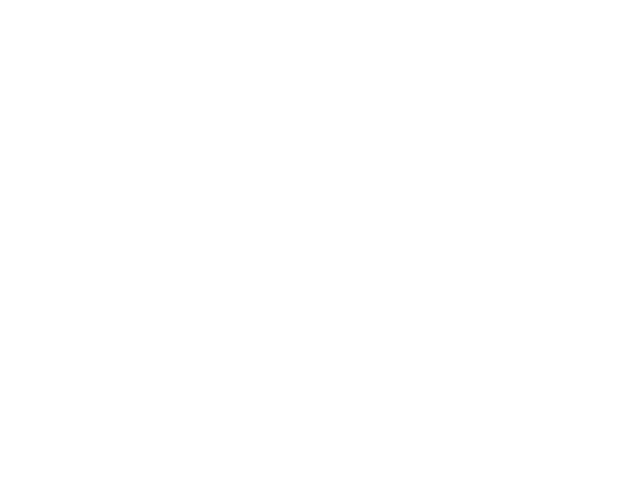

In [14]:
plt.figure()
plt.plot(np.arange(times[0],times[0]+len(values[0])),values[0])
plt.plot(np.arange(times[1],times[1]+len(values[1])),values[1])